# Critical Exponent Fit

In this notebook we fit power law to our transient lifetime means.

## Imports

In [2]:
# Assume we're running from project root
%cd .. 

/Users/cfn18/Documents/PhD-Work/Thesis-Computing/Determinisitc/l96_ebm_boundary_crisis


In [3]:
# Local imports
from src.transient_lifetimes import TransientLifetimes

# Other imports
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

## Plot/Data Locations

In [4]:
plot_pd = Path('plots')
data_pd = Path('data')
config_pd = Path('cfg')

## Critical Exponent Fit

In [5]:
# Load lifetime data

csv_file = data_pd/'transient_lifetimes.csv'
SBTransientLifetimes = TransientLifetimes(csv_file, "sb", 14.9)
WTransientLifetimes = TransientLifetimes(csv_file, "w", 7.9)

          distance_from_crit  mean_tipping_time  standard_error  sample_size
S                                                                           
7.800000            0.100000       21955.370103       45.268804          485
7.766667            0.133333        5166.124649       10.352955          499
7.733333            0.166667        1429.804409        2.865339          499
7.700000            0.200000         453.079600        0.906159          500
7.666667            0.233333         148.790400        0.297581          500
7.633333            0.266667          59.702000        0.119404          500
7.600000            0.300000          32.010020        0.064148          499
7.566667            0.333333          18.609400        0.037219          500
7.533333            0.366667          12.500601        0.025051          499
7.500000            0.400000           8.273200        0.016546          500


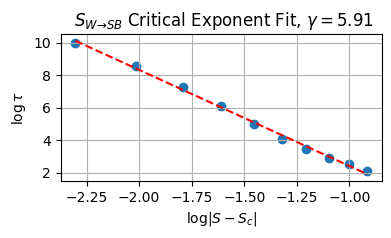

In [6]:
print(WTransientLifetimes.mean_lifetimes().sort_values('distance_from_crit'))
fig, ax = WTransientLifetimes.critical_exponent_fit_plot()
fig.tight_layout()
# fig.savefig(plot_pd/'S_W_to_SB_critical_exponent_fit.pdf')

           distance_from_crit  mean_tipping_time  standard_error  sample_size
S                                                                            
15.000000            0.100000       41770.154255      444.363343           94
15.033333            0.133333       46843.308139      272.344815          172
15.066667            0.166667       44066.703901      156.264907          282
15.100000            0.200000       35498.568112       90.557572          392
15.133333            0.233333       26408.165979       54.449827          485
15.166667            0.266667       15225.532329       30.573358          498
15.200000            0.300000        7449.856000       14.899712          500
15.233333            0.333333        4392.942105       14.450467          304


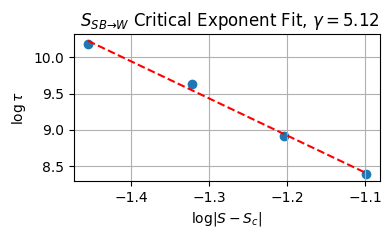

In [7]:
print(SBTransientLifetimes.mean_lifetimes(S_list=SBTransientLifetimes.default_S_list[:]).sort_values('distance_from_crit'))
fig, ax = SBTransientLifetimes.critical_exponent_fit_plot(S_list=SBTransientLifetimes.default_S_list[4:])
fig.tight_layout()
# fig.savefig(plot_pd/'S_SB_to_Wpr_critical_exponent_fit.pdf')

In [34]:
latex_ds = WTransientLifetimes.mean_lifetimes().sort_values('distance_from_crit')
latex_ds['S'] = latex_ds.index
print(latex_ds[['S', 'distance_from_crit', 'mean_tipping_time', 'sample_size', 'standard_error']].round(decimals=2).to_latex(index=False))
latex_ds.columns

\begin{tabular}{rrrrr}
\toprule
   S &  distance\_from\_crit &  mean\_tipping\_time &  sample\_size &  standard\_error \\
7.80 &                0.10 &           21955.37 &          485 &           45.27 \\
\midrule
7.77 &                0.13 &            5166.12 &          499 &           10.35 \\
7.73 &                0.17 &            1429.80 &          499 &            2.87 \\
7.70 &                0.20 &             453.08 &          500 &            0.91 \\
7.67 &                0.23 &             148.79 &          500 &            0.30 \\
7.63 &                0.27 &              59.70 &          500 &            0.12 \\
7.60 &                0.30 &              32.01 &          499 &            0.06 \\
7.57 &                0.33 &              18.61 &          500 &            0.04 \\
7.53 &                0.37 &              12.50 &          499 &            0.03 \\
7.50 &                0.40 &               8.27 &          500 &            0.02 \\
\bottomrule
\end{tabular}



/var/folders/j2/xvq6h5k13pjd0s455xjy4v980000gn/T/ipykernel_14944/2495684554.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(latex_ds[['S', 'distance_from_crit', 'mean_tipping_time', 'sample_size', 'standard_error']].round(decimals=2).to_latex(index=False))


Index(['distance_from_crit', 'mean_tipping_time', 'standard_error',
       'sample_size', 'S'],
      dtype='object')

/Users/cfn18/Documents/PhD-Work/Thesis-Computing/Determinisitc/l96_ebm_boundary_crisis/src/transient_lifetimes.py:94: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/cfn18/Documents/PhD-Work/Thesis-Computing/Determinisitc/l96_ebm_boundary_crisis/src/transient_lifetimes.py:94: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/cfn18/Documents/PhD-Work/Thesis-Computing/Determinisitc/l96_ebm_boundary_crisis/src/transient_lifetimes.py:94: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/cfn18/Documents/PhD-Work/Thesis-Computing/Determinisitc/l96_ebm_boundary_crisis/src/transient_lifetimes.py:94: UserWarning: Matplotlib is currently using module://matplotlib_inl

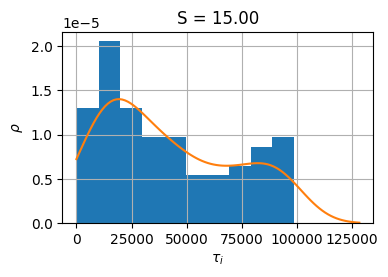

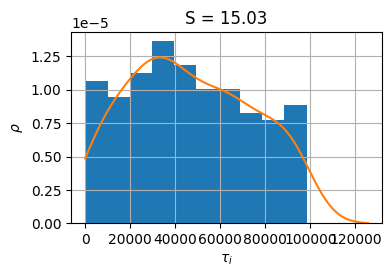

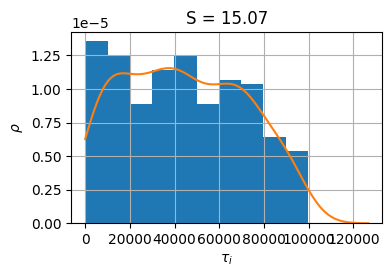

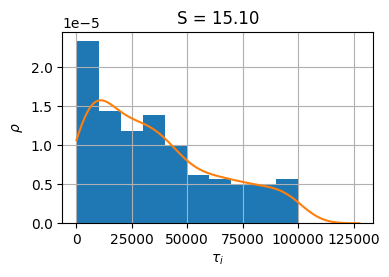

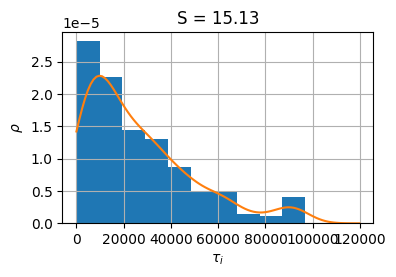

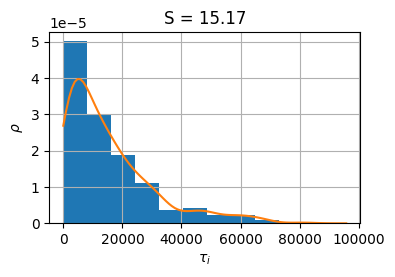

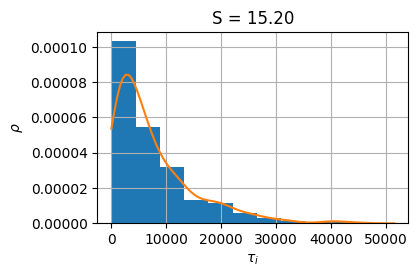

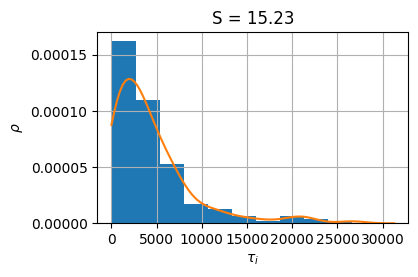

In [9]:
SBTransientLifetimes.all_transient_lifetime_histograms()